In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the Excel file
df = pd.read_excel("Careers.xlsx")

# Remove rows with "Nan" values in the 'Career' column
df = df[~df['Career '].astype(str).str.contains('nan', case=False, na=False)]

# Ensure all values in 'Career' column are strings
df['Career '] = df['Career '].astype(str)

# Remove rows with empty 'Career' after preprocessing
df = df[df['Career '].str.strip() != '']

# Display the preprocessed dataframe
df.head()


,Career
6,Police Coast Guard
10,Writer
11,Business Analyst \n
19,Designer
21,Physiotherapist


In [3]:
# Preprocess the text data
texts = df['Career ']

# Convert the text data into numerical format using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(texts)


In [4]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Apply DBSCAN clustering algorithm
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(X)

# Get labels from DBSCAN
labels_dbscan = dbscan.labels_

# Calculate the silhouette score
if len(set(labels_dbscan)) > 1:
    silhouette_avg_dbscan = silhouette_score(X, labels_dbscan)
    print(f'DBSCAN Silhouette Score: {silhouette_avg_dbscan:.2f}')
else:
    print("DBSCAN Silhouette Score: All samples are clustered into a single cluster or noise.")

df['cluster_dbscan'] = labels_dbscan


DBSCAN Silhouette Score: 0.17


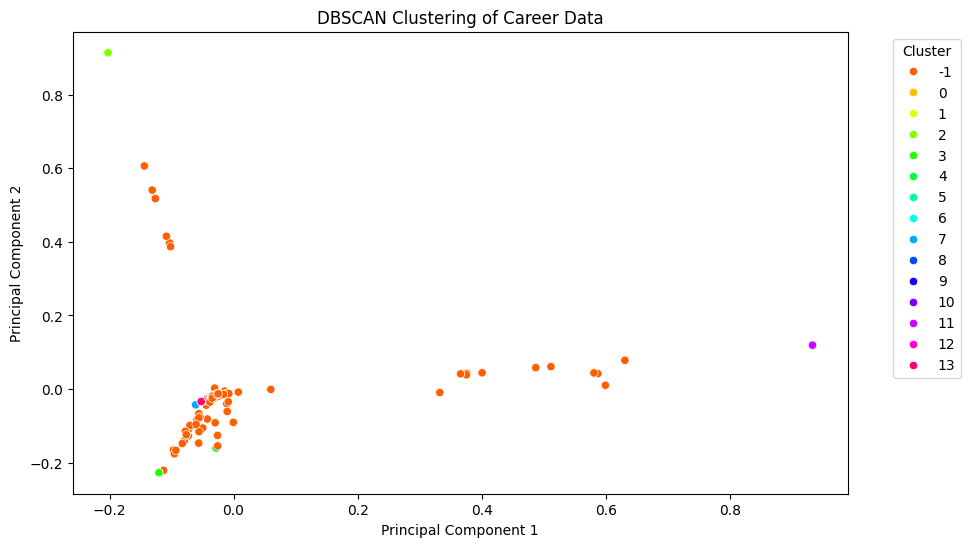

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Function to plot clusters
def plot_clusters(X, labels, title):
    pca = PCA(n_components=2)
    scatter_plot_points = pca.fit_transform(X.toarray())
    
    colors = sns.color_palette("hsv", len(set(labels)))
    x_axis = scatter_plot_points[:, 0]
    y_axis = scatter_plot_points[:, 1]

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x_axis, y=y_axis, hue=labels, palette=colors, legend='full')
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Plot DBSCAN clusters
plot_clusters(X, labels_dbscan, 'DBSCAN Clustering of Career Data')



In [6]:
# Display sample text from each cluster for DBSCAN
print("DBSCAN Clusters:")
for cluster in set(labels_dbscan):
    print(f"\nCluster {cluster}:")
    samples = df[df['cluster_dbscan'] == cluster]['Career '].head(3).values
    for sample in samples:
        print(f" - {sample}")

DBSCAN Clusters:

Cluster 0:
 - Writer 
 - Writer 
 - Writer

Cluster 1:
 - Physiotherapist 
 - Physiotherapist
 - Physiotherapist

Cluster 2:
 - Teacher 
 - Teacher 
 - Teacher

Cluster 3:
 - Game Developer 
 - Game Developer
 - Game Developer


Cluster 4:
 - Cybersecurity Analyst
 - Cybersecurity Analyst
 - Cybersecurity Analyst


Cluster 5:
 - Doctor
 - Doctor 
 - Doctor

Cluster 6:
 - Pilot 
 - Pilot
 - Pilot

Cluster 7:
 - Nurse
 - Nurse
 - Nurse 

Cluster 8:
 - Entrepreneur

 - Entrepreneur
 - Entrepreneur 

Cluster 9:
 - Occupational Therapist 
 - Occupational Therapist
 - Occupational Therapist

Cluster 10:
 - Programmer

 - Programmer 
 - Programmer

Cluster 11:
 - It Engineer
 - Engineer
 - Engineer

Cluster 12:
 - Accountant
 - Accountant 
 - Accountant 

Cluster 13:
 - Psychologist
 - Psychologist 
 - Psychologist


Cluster -1:
 - Police Coast Guard
 - Business Analyst 

 - Designer 
